In [335]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [336]:
def load_npy_files(base_dir, epoch, batch, layer):
    """
    Load all .npy files from a specific epoch, batch, and layer directory.

    Args:
        base_dir (str): The base directory containing all the runs.
        epoch (str): The epoch directory name (e.g., 'epoch_01').
        batch (str): The batch directory name (e.g., 'batch_0').
        layer (str): The layer directory name (e.g., 'layer_00').

    Returns:
        list: A list of numpy arrays loaded from .npy files in the specified layer directory.
    """
    # Construct the directory path
    target_dir = os.path.join(base_dir, epoch, batch, layer)
    
    # Check if the directory exists
    if not os.path.exists(target_dir):
        raise FileNotFoundError(f"Directory {target_dir} does not exist.")
    
    # List all .npy files in the directory
    npy_files = [f for f in os.listdir(target_dir) if f.endswith('.npy')]
    
    # Load each .npy file and store it in a list
    data = []
    for npy_file in npy_files:
        file_path = os.path.join(target_dir, npy_file)
        data.append(np.load(file_path))
    
    return data


In [337]:
# Example usage
# base_dir = 'path/to/run_06'
# Check if the 'results' directory exists
if os.path.exists('results') and os.path.isdir('results'):
    os.chdir('results')
base_dir = os.path.join(os.getcwd(), 'run best')


# Now base_dir contains the full path to 'run_06'
print(f"Base directory: {base_dir}")
epoch = 'epoch 01'  # Replace with your specific epoch
batch = 'batch 0'   # Replace with your specific batch
layer = 'layer 03'  # Replace with your specific layer

npy_data = load_npy_files(base_dir, epoch, batch, layer)

# Example to print the number of .npy files loaded
print(f"Number of .npy files loaded: {len(npy_data)}")

# Optionally, process or inspect the data
for i, array in enumerate(npy_data):
    # print(array)
    print(f"Array {i+1} shape: {array.shape}")



Base directory: /Users/yajatkapoor/Downloads/results/run best
Number of .npy files loaded: 6
Array 1 shape: (50, 8, 65, 64)
Array 2 shape: (50, 8, 65, 64)
Array 3 shape: (50, 8, 65, 64)
Array 4 shape: (50, 8, 65, 64)
Array 5 shape: (50, 65, 512)
Array 6 shape: (50, 8, 65, 65)


In [338]:
# os.getcwd()

In [339]:
# # target_dir = os.path.join(base_dir, epoch, batch, layer)
# # target_dir = base_dir
# base_dir = os.getcwd()
    
# # Check if the directory exists
# if not os.path.exists(base_dir):
#     raise FileNotFoundError(f"Directory {target_dir} does not exist.")

In [340]:
os.path.exists(base_dir)

True

In [347]:
def heat_map_display(img_idx,epoch_no,head):
    
    data_list=list()
    for i in range(6):
        epoch = 'epoch '+str(epoch_no)  # Replace with your specific epoch

        batch = 'batch 0'   # Replace with your specific batch

        layer = 'layer 0'+str(i)  # Replace with your specific layer

        npy_data = load_npy_files(base_dir, epoch, batch, layer)
        data_list.append(npy_data)
    
    
    # print(type(data_list[0][5]))
    # print(type(data_list[0][5][img_idx][head]))
   
    for i in range(len(data_list)):
        
        attention_map = data_list[i][5]
        type(attention_map)
       
        plt.figure(figsize=(10, 8))  # Create a figure with a specified size
        sns.heatmap(attention_map[img_idx][head], cmap='viridis', annot=False, cbar=True, linewidths=0.5, linecolor='white')
        plt.xlabel('Key Tokens')
        plt.ylabel('Query Tokens')
        plt.title('Attention Heatmap')
        plt.show()


       
    

    


        


In [342]:


def heat_map(target_data,img_idx):
    attention_scores =target_data
    attention_scores=target_data[img_idx]

    # Average over the first dimension (samples), resulting in shape (8, 65, 64)
    # average_attention = attention_scores.mean(axis=0)
    
    # Determine the grid size
    # num_heads = average_attention.shape[0]
    # num_heads = attention_scores.shape[0]
    num_heads=4
    grid_size = 3
    # Create a figure for the grid of plots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each head's attention heatmap
    for i in range(num_heads):
        print(type(attention_scores[i]))
        sns.heatmap(attention_scores[i], annot=False,cmap='viridis',cbar=True,ax=axes[i])
        # print(attention_scores[i].shape)

        axes[i].set_title(f'Head {i + 1}')
        axes[i].set_xlabel('Key Tokens')
        axes[i].set_ylabel('Query Tokens')

    # Hide any unused subplots
    for j in range(num_heads, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [343]:
npy_data[2][2].shape

(8, 65, 64)

In [344]:
print(type(npy_data))

<class 'list'>


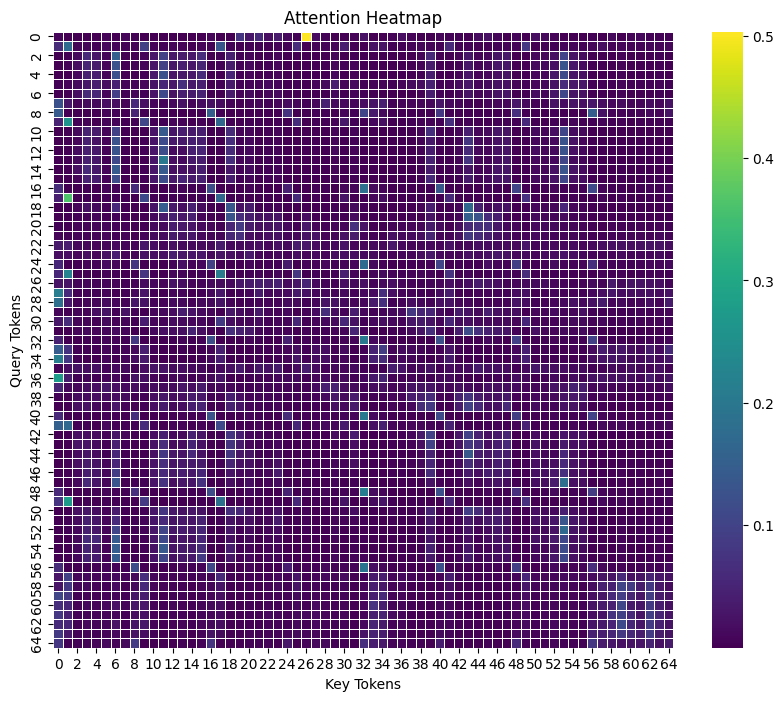

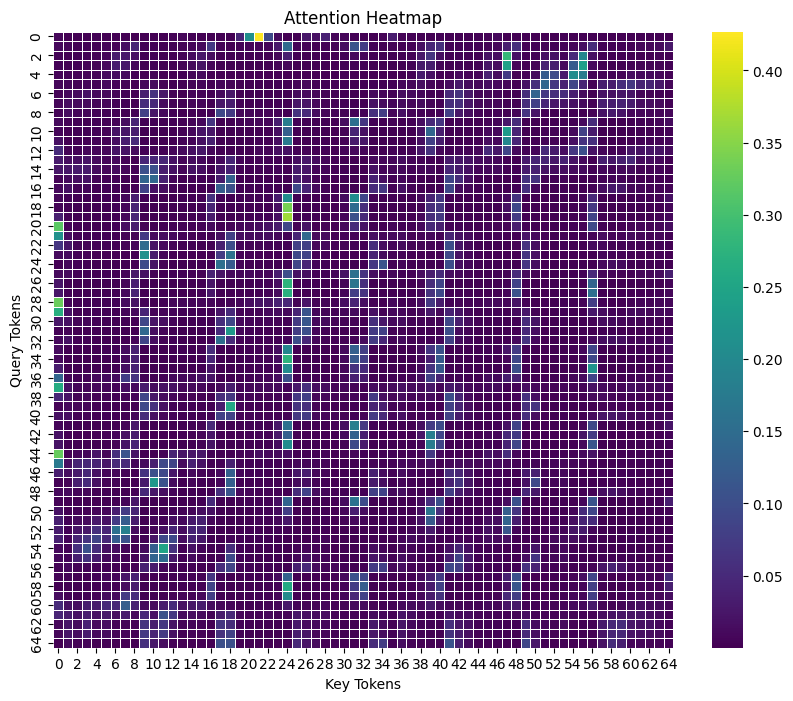

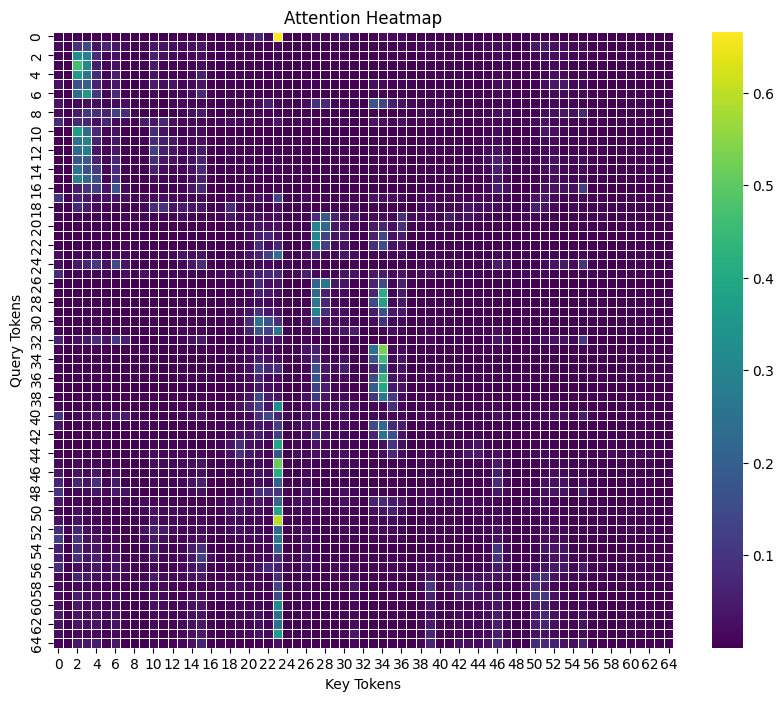

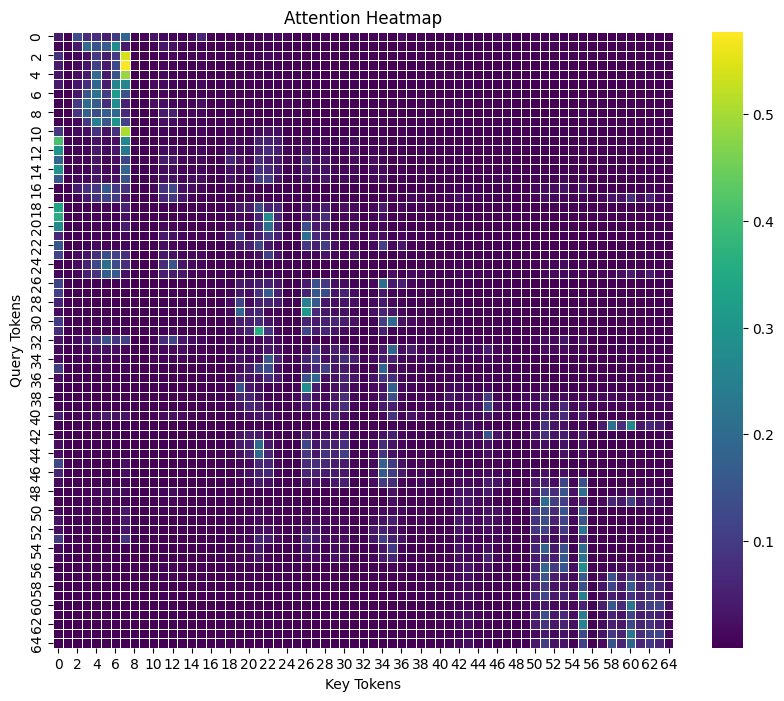

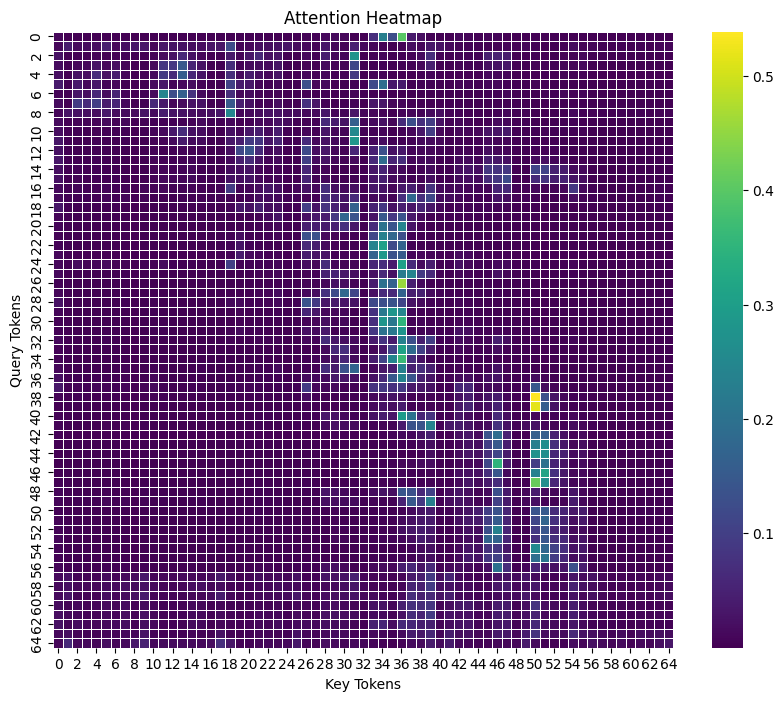

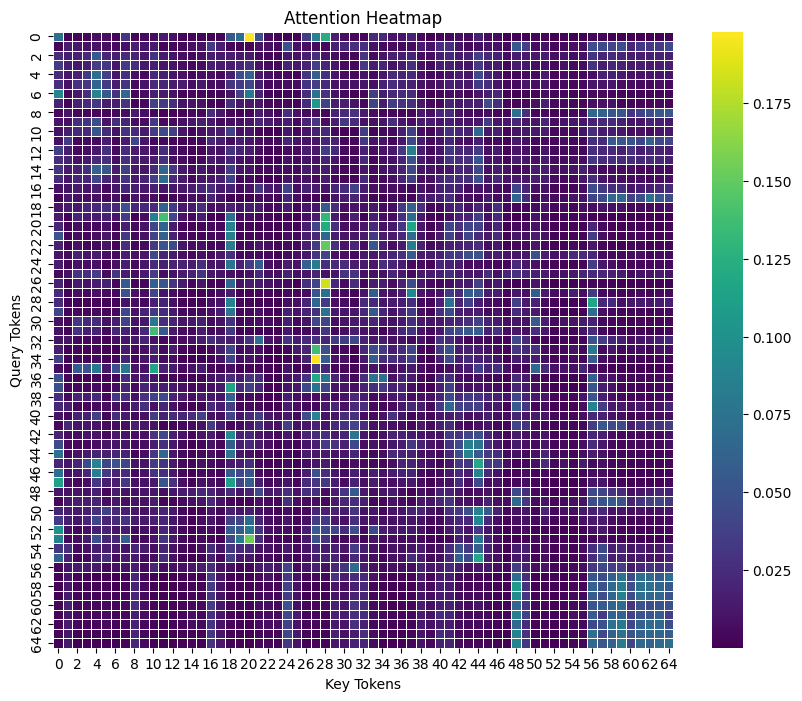

In [348]:
heat_map_display(2,90,1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


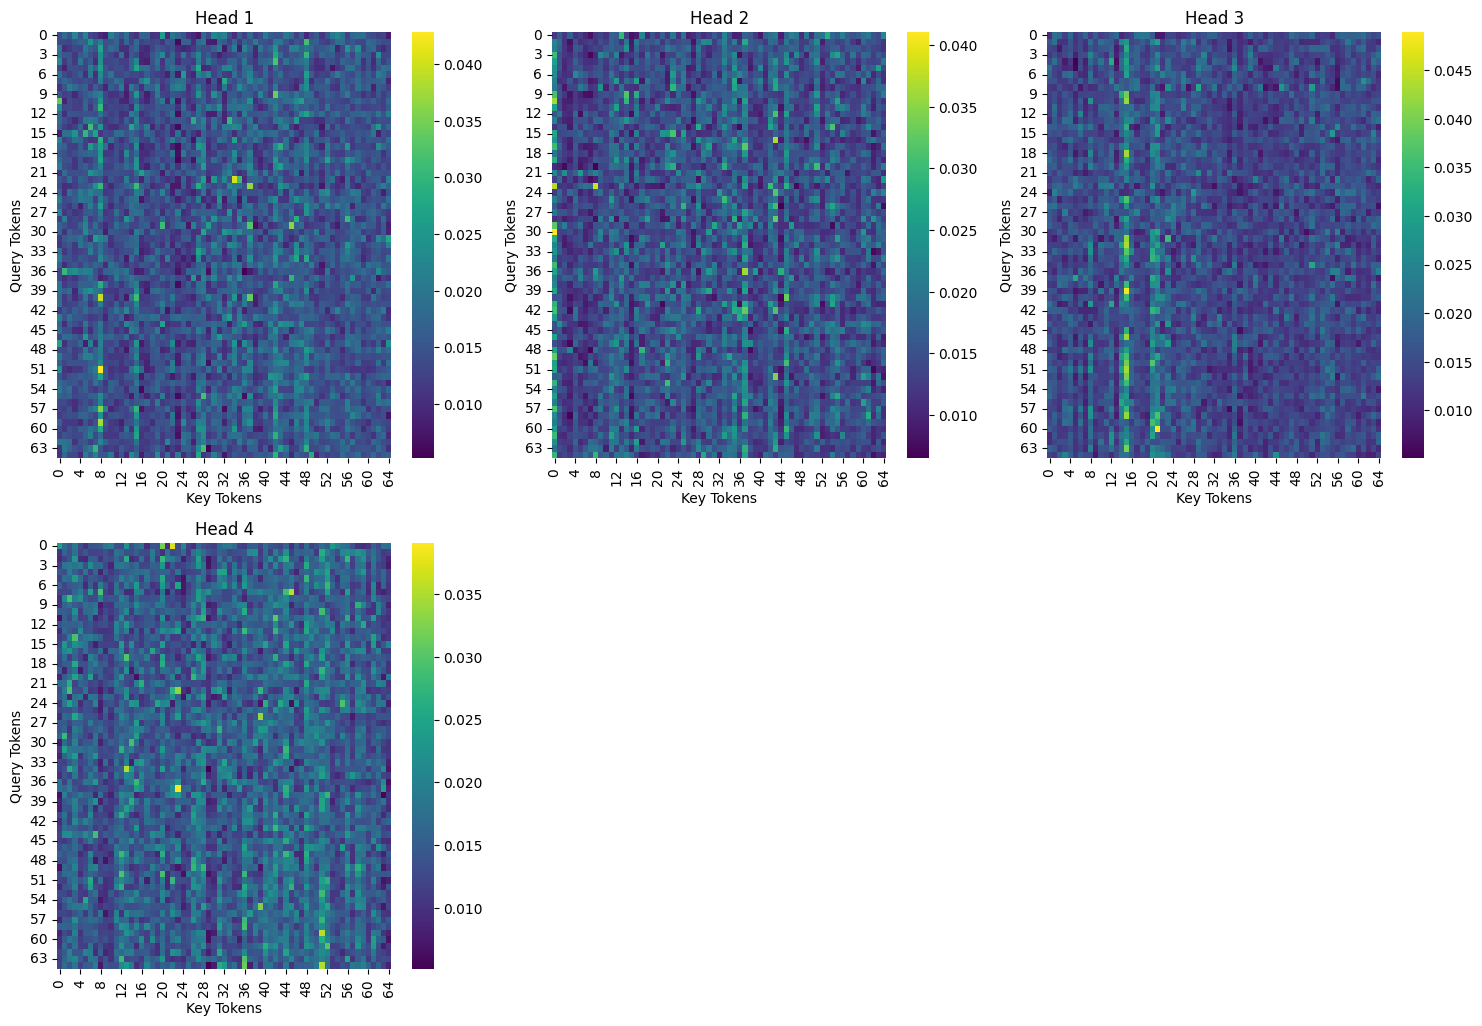

In [346]:
heat_map(npy_data[5],img_idx = 3)